In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
import random

# Tasca del test d'hipòtesis

## Nivell 1

- Exercici 1: Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%. 

In [3]:
# Importem el fitxer csv per crear el dataframe
nba_players = pd.read_csv('../db/NBA PLAYERS STATS/player_data.csv', index_col=0)
#Eiminem les files sense dades
nba_players.dropna(inplace=True)

In [4]:
# Afegim la columna amb les possiciones traduides a numeros
position_numeric = []
for item in nba_players['position']: 
    if item == 'C': 
        position_numeric.append(5)
    elif item == 'C-F': 
        position_numeric.append(4)
    elif item == 'F-C': 
        position_numeric.append(4)
    elif item == 'F':
        position_numeric.append(3)
    elif item == 'F-G':
        position_numeric.append(2)
    elif item == 'G-F':
        position_numeric.append(2)
    elif item == 'G':
        position_numeric.append(1)
   
nba_players.insert(3, 'position_numeric', position_numeric)

In [5]:
# Afegim una columna amb l'alçada en cm. 
height_cm = []
for item in nba_players['height']:
    foot, inches = item.split('-')
    height = int((int(foot))*30.48 + (int(inches)*2.54))
    height_cm.append(height)

nba_players.insert(5, 'height cm', height_cm)

In [6]:
# Agfegim Columna pes en Kg

weight_kg = []
for item in nba_players['weight']: 
    weight = item * 453.6 /1000
    weight_kg.append(weight)

nba_players.insert(7, 'weight Kg', weight_kg)

In [7]:
# Guardem el nou dataframe com a csv
nba_players.to_csv('../db/NBA PLAYERS STATS/player_data_Eur_units.csv')

In [8]:
nba_players.head()

,year_start,year_end,position,position_numeric,height,height cm,weight,weight Kg,birth_date,college
name,,,,,,,,,,
Alaa Abdelnaby,1991,1995,F-C,4,6-10,208,240.0,108.8640,"June 24, 1968",Duke University
Zaid Abdul-Aziz,1969,1978,C-F,4,6-9,205,235.0,106.5960,"April 7, 1946",Iowa State University
Kareem Abdul-Jabbar,1970,1989,C,5,7-2,218,225.0,102.0600,"April 16, 1947","University of California, Los Angeles"
Mahmoud Abdul-Rauf,1991,2001,G,1,6-1,185,162.0,73.4832,"March 9, 1969",Louisiana State University
Tariq Abdul-Wahad,1998,2003,F,3,6-6,198,223.0,101.1528,"November 3, 1974",San Jose State University


In [9]:
nba_players.describe()

,year_start,year_end,position_numeric,height cm,weight,weight Kg
count,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000,4213.000000
mean,1984.062663,1988.267505,2.485402,197.235224,207.716117,94.220031
std,20.699757,21.592122,1.344712,9.045153,25.447824,11.543133
min,1947.000000,1947.000000,1.000000,160.000000,133.000000,60.328800
25%,1969.000000,1972.000000,1.000000,190.000000,189.000000,85.730400
50%,1985.000000,1990.000000,3.000000,198.000000,205.000000,92.988000
75%,2001.000000,2007.000000,3.000000,205.000000,225.000000,102.060000
max,2018.000000,2018.000000,5.000000,231.000000,360.000000,163.296000


Per abordar el primer problema farem la seguent Hipótesis: La alçada dels Escortes(2) es mes alta que la dels Bases(1)

H0 = μe <= μb

H1 = μe > μb 

Ⲁ = 0.05


In [10]:
#Creem la mostra amb la alçada dels escortes i la dels bases

nba_bases = nba_players[nba_players.position_numeric == 1]
nba_escoltes = nba_players[nba_players.position_numeric == 2]

In [11]:
nba_bases['height cm'].describe()

count    1501.000000
mean      188.777482
std         5.727808
min       160.000000
25%       185.000000
50%       190.000000
75%       193.000000
max       203.000000
Name: height cm, dtype: float64

In [12]:
nba_escoltes['height cm'].describe()

count    541.000000
mean     194.927911
std        5.538115
min      177.000000
25%      193.000000
50%      195.000000
75%      198.000000
max      208.000000
Name: height cm, dtype: float64

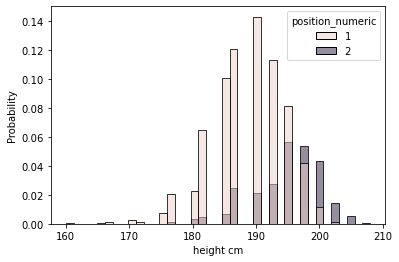

In [13]:
# Representem graficament les dues distribucions

nba_ex1 = nba_players[nba_players.position_numeric <= 2]
sns.histplot(nba_ex1, x='height cm', stat='probability', hue='position_numeric')
plt.show()

In [14]:
# Resolem el métode manualment: 
mitja_pob = nba_bases['height cm'].mean()
mitja_samp = nba_escoltes['height cm'].mean()
std_dev_samp = nba_escoltes['height cm'].std()
sample_size = nba_escoltes['height cm'].count()

# formula: 
t = (mitja_samp - mitja_pob) / (std_dev_samp/((sample_size-1)**0.5))
print(t)

25.807168013749383


busquem el valor de significió a la taula per comparar amb l'estadistic: 

![ttable.png](./img/ttable.png)

In [15]:
# Resolem pel métode de python assumint que la mitjana de la mitjana de la poblacio es la mitjana dels jugadors bases:
alpha = 0.05
stat, p = stats.ttest_1samp(nba_escoltes['height cm'], nba_bases['height cm'].mean(), alternative= 'greater')
print(f'stat: {stat}, p: {p}, alpha:{alpha}')
if p > alpha:
	print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
	print('p < alpha : H0 can be refused. Probably different distributions')

stat: 25.831052487175945, p: 1.0576503512793006e-96, alpha:0.05
p < alpha : H0 can be refused. Probably different distributions


In [16]:
# Resolem pel métode de python comparant les dues mostres:
alpha = 0.05
stat, p = stats.ttest_ind(nba_escoltes['height cm'], nba_bases['height cm'], equal_var=True, alternative='greater')
print(f'stat: {stat}, p: {p}, alpha:{alpha}')
if p > alpha:
	print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
	print('p < alpha : H0 can be refused. Probably different distributions')

stat: 21.600059911979372, p: 1.182626157161263e-93, alpha:0.05
p < alpha : H0 can be refused. Probably different distributions


fem un altre exemple amb dos poblacions de la mateixa mostra

Generem la següent Hipótesis: La alçada dels jugadors de la població 1 es igual a la alçada dels jugadors de la població 2

H0 = μ1 = μ2

H1 = μ1 != μ2

Ⲁ = 0.05

In [56]:
# A partir del dataframe generem dos mostres aleatories sistemátiques del 10% de la població (utilitzem la funció definida a la tasca 8)

def sampling_rand_syst(df,sample_method, sample_size=0,sample_percent=30):
    if sample_size == 0:
        sample_size = round(len(df) / 100 * sample_percent)
    else: 
        sample_percent = round(sample_size / len(df) * 100, 2)
    if sample_method == 1: # Aleatori simple
        df_random = df.sample(sample_size) #select % sample points from a dataset.
        parameters = f'Sample(%): {sample_percent}%, Sample size:{sample_size}, Sampling Metod: Aleatori Simple'
        return df_random, parameters
    elif sample_method == 2: # Sistematic
        step = len(df) // sample_size
        start_rand = random.randint(0, (step - 1))
        indexes = np.arange(start_rand, len(df), step=step)
        df_systematic = df.iloc[indexes]
        parameters = f'Sample(%): {sample_percent}%, Sample size:{sample_size}, Sampling Metod: Sistemàtic'
        return df_systematic, parameters

sample_1, sample_1_parameters = sampling_rand_syst(nba_players, 2, sample_percent=10)
sample_2, sample_2_parameters = sampling_rand_syst(nba_players, 2, sample_percent=10)

print(sample_1_parameters)
print(sample_2_parameters)

Sample(%): 10%, Sample size:421, Sampling Metod: Sistemàtic
Sample(%): 10%, Sample size:421, Sampling Metod: Sistemàtic


In [57]:
sample_1['height cm'].describe()

count    421.000000
mean     196.814727
std        8.902320
min      175.000000
25%      190.000000
50%      198.000000
75%      203.000000
max      220.000000
Name: height cm, dtype: float64

In [58]:
sample_2['height cm'].describe()

count    422.000000
mean     197.663507
std        8.777024
min      167.000000
25%      190.000000
50%      198.000000
75%      203.000000
max      223.000000
Name: height cm, dtype: float64

In [59]:
# Resolem el métode manualment: 
mitja_pob = sample_2['height cm'].mean()
mitja_samp = sample_1['height cm'].mean()
std_dev_samp = sample_1['height cm'].std()
sample_size = sample_1['height cm'].count()

# formula: 
t = (mitja_samp - mitja_pob) / (std_dev_samp/((sample_size-1)**0.5))
print(t)


-1.9539646615241488


In [60]:
# Resolem pel métode de python assumint que la mitjana del sample 2 es la mitjana de la poblacio:
alpha = 0.025
stat, p = stats.ttest_1samp(sample_1['height cm'], sample_2['height cm'].mean())
print(f'stat: {stat}, p: {p}, alpha:{alpha}')
if p > alpha:
	print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
	print('p < alpha : H0 can be refused. Probably different distributions')

stat: -1.9562894269644773, p: 0.05109342949576171, alpha:0.025
p > alpha : H0 cannot be refused. Probably the same distribution


In [61]:
# Si comparem les dos distribucions el resultat es diferent
stat, p = stats.ttest_ind(sample_2['height cm'], sample_1['height cm'], equal_var=False, alternative='two-sided')
alpha_mid = 0.025
print('stat=%.3f, p=%.3f' % (stat, p))
print(f'stat: {stat}, p: {p}, alpha:{alpha}')
if p > alpha_mid:
	print('p > alpha : H0 cannot be refused. Probably the same distribution')
else:
	print('p < alpha : H0 can be refused. Probably different distributions')

stat=1.394, p=0.164
stat: 1.3938885481648478, p: 0.1637195479770718, alpha:0.025
p > alpha : H0 cannot be refused. Probably the same distribution


## Nivell 2

- Exercici 2: Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona dos atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [117]:
nba_draft_80s = nba_players[(nba_players.year_start >= 1980) & (nba_players.year_start < 1990)]
nba_draft_90s = nba_players[(nba_players.year_start >= 1990) & (nba_players.year_start < 2000)]
nba_draft_00s = nba_players[(nba_players.year_start >= 2000) & (nba_players.year_start < 2010)]
print(nba_draft_80s.shape)
print(nba_draft_90s.shape)
print(nba_draft_00s.shape)

(632, 10)
(649, 10)
(555, 10)


In [114]:
draft_80_sample, draft_80_parameters = sampling_rand_syst(nba_draft_80s['height cm'], 1, sample_size=100)
print(draft_80_parameters)
draft_80_sample.describe()

Sample(%): 15.82%, Sample size:100, Sampling Metod: Aleatori Simple


count    100.000000
mean     200.890000
std        9.204627
min      177.000000
25%      193.000000
50%      201.500000
75%      208.000000
max      220.000000
Name: height cm, dtype: float64

In [111]:
draft_90_sample, draft_90_parameters = sampling_rand_syst(nba_draft_90s['height cm'], 1, sample_size=100)
print(draft_90_parameters)
draft_90_sample.describe()

Sample(%): 15.41%, Sample size:100, Sampling Metod: Aleatori Simple


count    100.000000
mean     197.830000
std        9.776342
min      165.000000
25%      192.250000
50%      200.000000
75%      205.000000
max      215.000000
Name: height cm, dtype: float64

In [115]:
stat, p = stats.ttest_rel(draft_80_sample, draft_90_sample)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=2.176, p=0.032
Probably different distributions


El resutado anterior p=0.032 se ha forzado repitiendo el sampleo hasta que ha dado un resultado p < aplha para observar la variabilidad del resultado en función del tamaño de la muestra. 

En la mayoría de casos el resultado que da es p > alpha.

In [68]:
#Probamos con una muestra mas grande n=250

In [116]:
draft_80_sample, draft_80_parameters = sampling_rand_syst(nba_draft_80s['height cm'], 1, sample_size=500)
draft_90_sample, draft_90_parameters = sampling_rand_syst(nba_draft_90s['height cm'], 1, sample_size=500)
print(draft_80_parameters)
print(draft_80_sample.describe())
print(draft_90_parameters)
print(draft_90_sample.describe())


Sample(%): 79.11%, Sample size:500, Sampling Metod: Aleatori Simple
count    500.000000
mean     199.864000
std        9.053476
min      160.000000
25%      193.000000
50%      200.000000
75%      205.000000
max      231.000000
Name: height cm, dtype: float64
Sample(%): 77.04%, Sample size:500, Sampling Metod: Aleatori Simple
count    500.000000
mean     199.222000
std        9.396878
min      165.000000
25%      193.000000
50%      200.000000
75%      205.000000
max      228.000000
Name: height cm, dtype: float64


In [97]:
stat, p = stats.ttest_rel(draft_80_sample, draft_90_sample)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=0.971, p=0.332
Probably the same distribution


## Nivell 3

- Exercici 3: Continua amb el conjunt de dades de tema esportiu que t'agradi i selecciona tres atributs del conjunt de dades. Calcula el p-valor i digues si rebutja la hipòtesi nul·la agafant un alfa de 5%.

In [134]:
draft_80_sample, draft_80_parameters = sampling_rand_syst(nba_draft_80s['height cm'], 1, sample_size=250)
draft_90_sample, draft_90_parameters = sampling_rand_syst(nba_draft_90s['height cm'], 1, sample_size=250)
draft_00_sample, draft_90_parameters = sampling_rand_syst(nba_draft_00s['height cm'], 1, sample_size=250)

# compare samples
stat, p = stats.f_oneway(draft_80_sample, draft_90_sample, draft_00_sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')



Statistics=1.620, p=0.199
Same distributions (fail to reject H0)


In [135]:
# compare samples
stat, p = stats.f_oneway(draft_80_sample, draft_90_sample)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=2.088, p=0.149
Same distributions (fail to reject H0)
